In [1]:
import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})


In [2]:
# koeficienty "a" a "b" filtru
a = [1,0,0.81]
b = [1,1,0]

In [3]:
# vypocet nul a polu
zeros = np.roots(b).astype(np.complex)
poles = np.roots(a).astype(np.complex)
print(f'nuly: {zeros}')
print(f'poly: {poles}')

nuly: [-1.+0.j  0.+0.j]
poly: [-0.+0.9j  0.-0.9j]


C:\Users\Honza\AppData\Local\Temp\ipykernel_6564\494804295.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zeros = np.roots(b).astype(np.complex)
C:\Users\Honza\AppData\Local\Temp\ipykernel_6564\494804295.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  poles = np.roots(a).astype(np.complex)


<IPython.core.display.Javascript object>


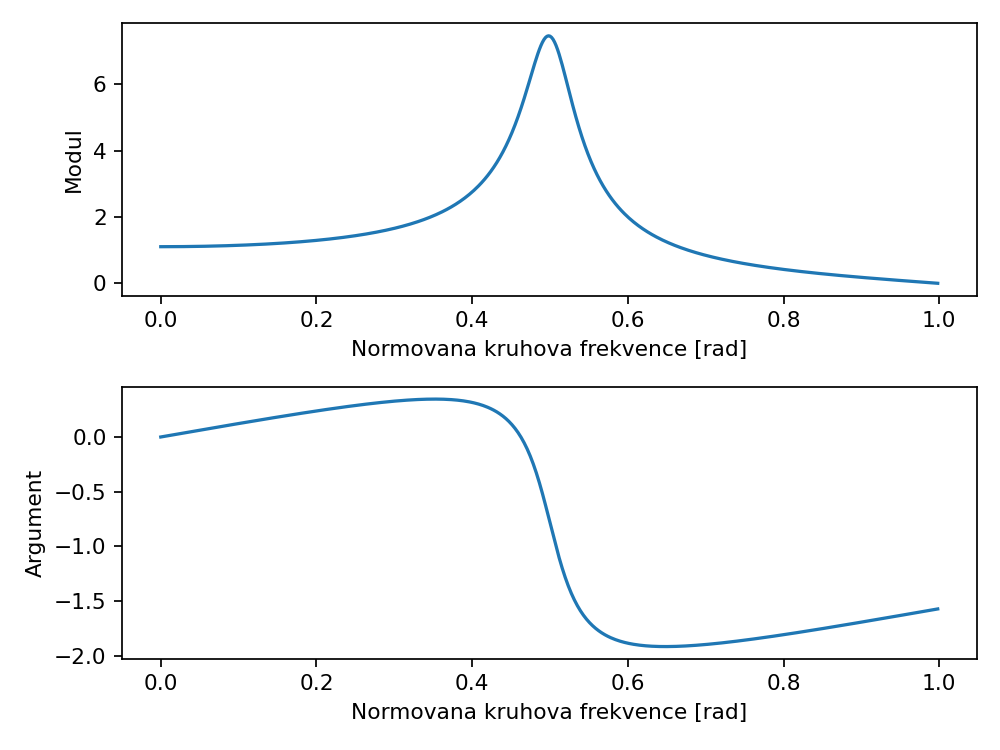

In [4]:
# vypocet frekvencni charakteristiky z "b" a "a"
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w, H = signal.freqz(b,a)

# plotting
f, ax = plt.subplots(2,1)
ax[0].plot(w/np.pi, np.abs(H))
ax[0].set_xlabel('Normovana kruhova frekvence [rad]')
ax[0].set_ylabel('Modul')
ax[1].plot(w/np.pi, np.angle(H))
ax[1].set_ylabel('Argument')
ax[1].set_xlabel('Normovana kruhova frekvence [rad]')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


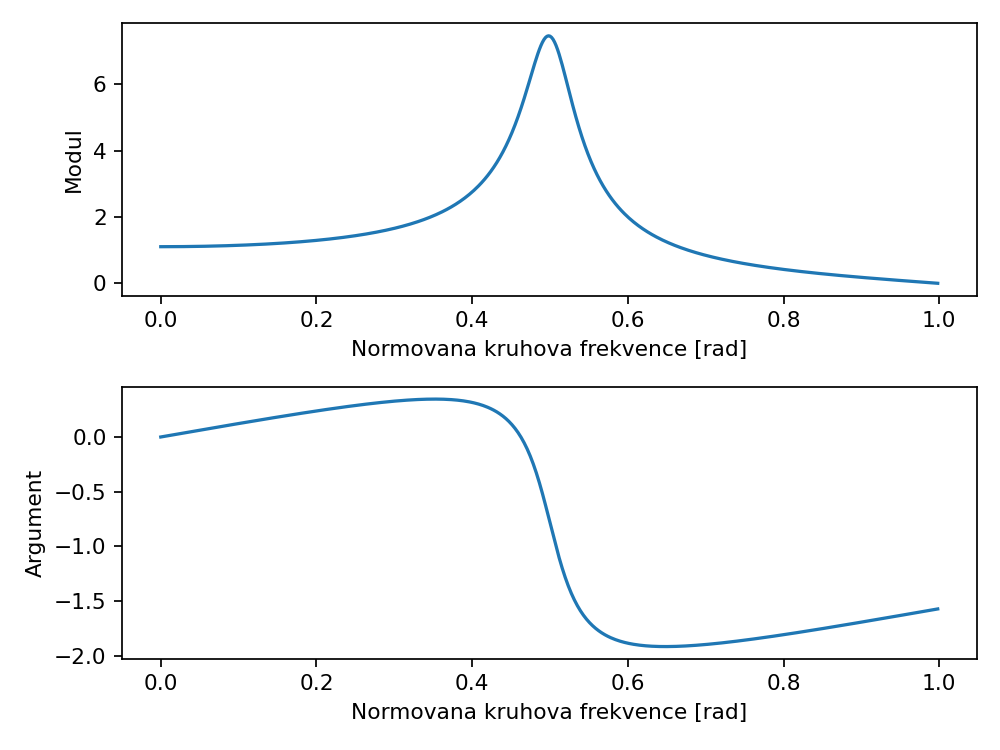

In [5]:
# to same pomoci DFT impulsni odezvy

# jednotkovy impuls
x = np.zeros(len(w)*2)
x[0] = 1

# impulsni odezva (delka omezena na 1024 vzorku -- filtr je IIR)
h2 = signal.lfilter(b,a,x)
# DFT impulsni odezvy (polovina spektra, delka 512 -- stejna jako u freqz)
H2 = np.fft.fft(h2)[:512]

# plotting
f, ax = plt.subplots(2,1)
ax[0].plot(w/np.pi, np.abs(H2))
ax[0].set_xlabel('Normovana kruhova frekvence [rad]')
ax[0].set_ylabel('Modul')
ax[1].plot(w/np.pi, np.angle(H2))
ax[1].set_ylabel('Argument')
ax[1].set_xlabel('Normovana kruhova frekvence [rad]')
plt.tight_layout()
plt.show()

In [6]:
print(f'Jsou stejne {np.allclose(H, H2)}')

Jsou stejne True


<IPython.core.display.Javascript object>


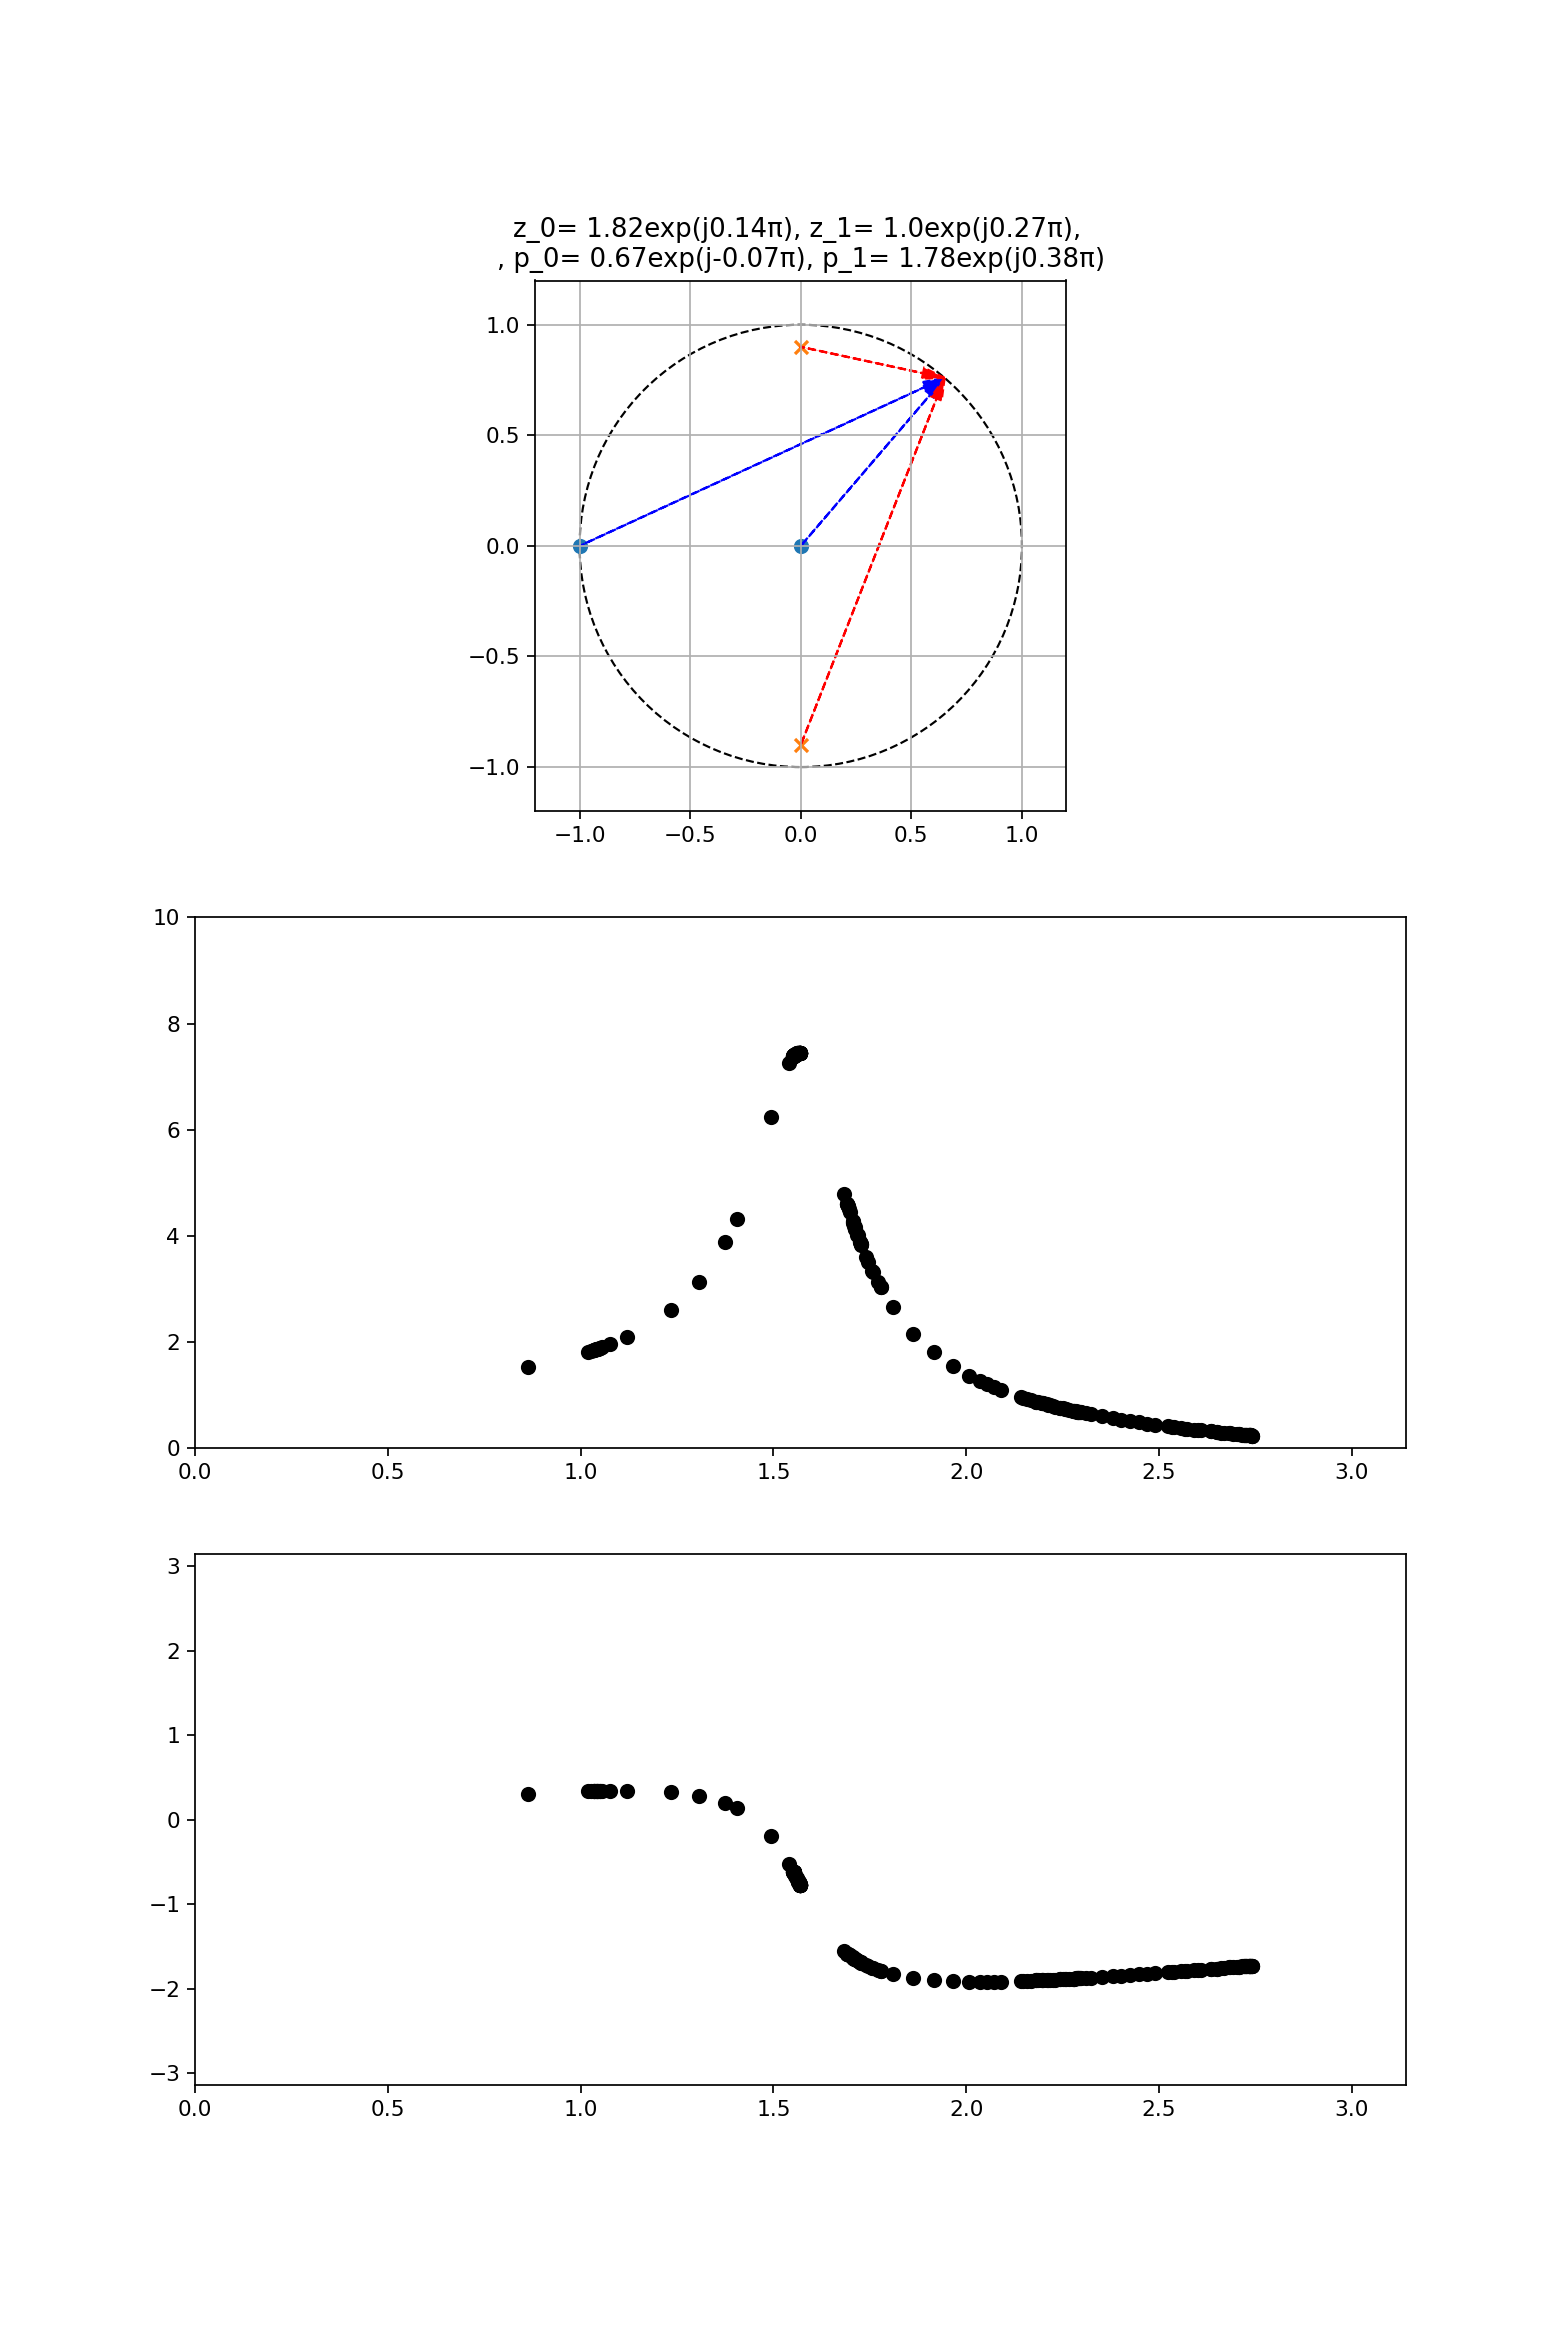

10

In [7]:
# a jak to pocitame na cvikach

def on_move(event):
    global z_s, p_s, ax, ax1, ax2
    if event.inaxes:
        # smazat stare sipky
        for z, p in zip(z_s, p_s):
            z.remove()
            p.remove()
        z_s = []
        p_s = []
        # ziskat ejw pro omegu danou kurzorem
        ejw = np.complex(event.xdata, event.ydata)
        ejw = ejw/np.abs(ejw) # o delce 1 (na jednotkove kruznici)
        # init Hejw
        Hejw = 1
        title = []
        # citatel 
        for i, z in enumerate(zeros):
            z_s.append(plot_arrow(z, ejw-z, 'b'))
            Hejw *= ejw-z
            title.append(f"z_{i}= {np.round(np.abs(ejw-z),2)}exp(j{np.round(np.angle(ejw-z)/np.pi,2)}π)")
        title.append('\n')
        # jmenovatel
        for i, p in enumerate(poles):
            p_s.append(plot_arrow(p, ejw-p, 'r'))
            Hejw /= ejw-p
            title.append(f"p_{i}= {np.round(np.abs(ejw-p),2)}exp(j{np.round(np.angle(ejw-p)/np.pi,2)}π)")
        ax1.scatter(np.angle(ejw), np.abs(Hejw), c='k')
        ax2.scatter(np.angle(ejw), np.angle(Hejw), c='k')
        ax.set_title(', '.join(title))

def on_click(event):
    if event.button is MouseButton.LEFT:
        pass
        
def plot_arrow(orig, dest, c):
    global ax
    return ax.arrow(orig.real, orig.imag, dest.real, dest.imag, fc=c, ec=c, 
                    head_width=0.05, head_length=0.1,length_includes_head=True, linestyle='--')
        
f, (ax, ax1, ax2) = plt.subplots(3,1, figsize=(10,15))
ax.add_artist(plt.Circle((0, 0), 1, color='k', fill=False, linestyle='--'))
ax.scatter(zeros.real, zeros.imag, marker='o')
ax.scatter(poles.real, poles.imag, marker='x')
z_s = []
p_s = []
for z in zeros:
    z_s.append(plot_arrow(z, np.exp(1j*0)-z, 'b'))
for p in poles:
    p_s.append(plot_arrow(p, np.exp(1j*0)-p, 'r'))
    
ax.set_aspect(1)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.grid()

ax1.set_xlim(0, np.pi)
ax1.set_ylim(0,10)

ax2.set_xlim(0, np.pi)
ax2.set_ylim(-np.pi, np.pi)


binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)


